In [388]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [437]:
train_data= pd.read_csv('traint.csv')
test_data= pd.read_csv('testt.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [390]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [438]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


In [439]:
total = test_data.isnull().sum().sort_values(ascending=False)
percent = (test_data.isnull().sum()/test_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
Embarked,0,0.000000
Ticket,0,0.000000


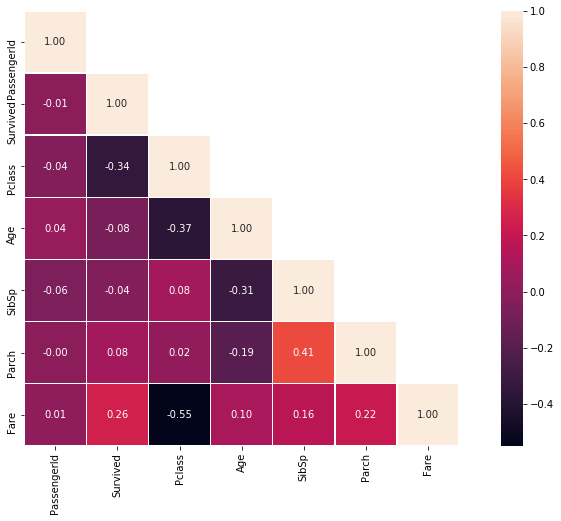

In [393]:
corr =train_data.corr()
plt.figure(figsize=(15,8))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
ax = sns.heatmap(corr,mask=mask,square = True,linewidths = .5, annot=True, fmt='.2f')
rotx = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
roty = ax.set_yticklabels(ax.get_yticklabels())
bottom, top = ax.get_ylim()

In [440]:
train_data.drop([ "Ticket" , "Cabin", "Name", ], axis = 1, inplace = True) 
test_data.drop([ "Ticket" , "Cabin"], axis = 1, inplace = True) 

In [441]:
train_data['Fare'].value_counts()

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64

In [442]:
val = train_data["Survived"].value_counts().values
label = ['Did not survive', 'Survived']
val.tolist()
table = pd.DataFrame(
    {'Label': label,
     'Count': val,
    })
table

,Label,Count
0,Did not survive,549
1,Survived,342


In [398]:
fig = px.pie(table,names='Label', values='Count',template='seaborn')
fig.update_traces(rotation=45, pull=[0.1,0.03,0.03,0.03,0.03],textinfo="percent+label", title='Survived Or Not')
fig.show()

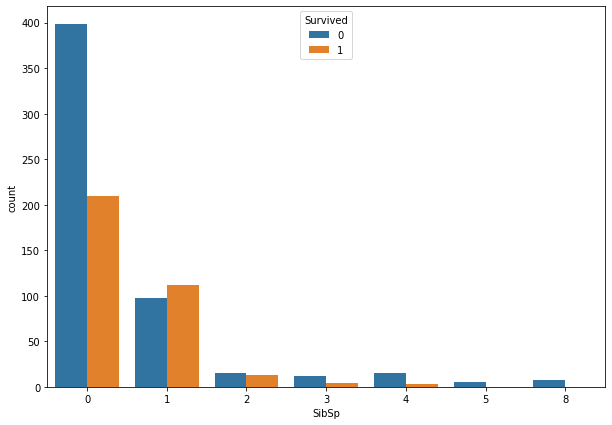

In [399]:
sns.countplot(data=train_data,x='SibSp', hue='Survived')
fig = plt.gcf()
fig.set_size_inches(10,7)

It shows that more than 200 people who did not have siblings or spouse on board survived the Titanic disaster.

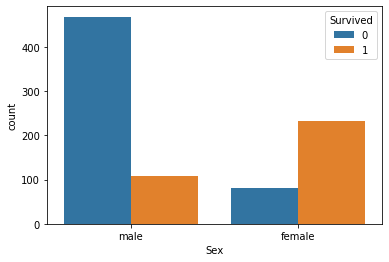

In [400]:
sns.countplot(x ='Sex', hue= 'Survived', data = train_data)

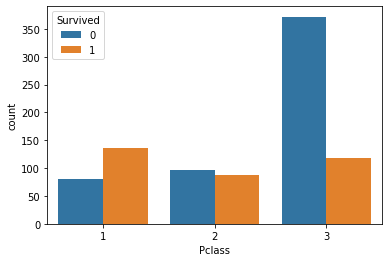

In [401]:
sns.countplot(x ='Pclass', hue= 'Survived', data = train_data)

In [443]:
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
train_data['Sex'] = le1.fit_transform(train_data['Sex'])
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


In [444]:
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
test_data['Sex'] = le2.fit_transform(test_data['Sex'])
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S


In [445]:
train_data["total_family"] = train_data["SibSp"] + train_data["Parch"] + 1

In [446]:
train_data["Single"] = train_data.total_family.apply(lambda x: 1 if x == 1 else 0)

In [447]:
test_data["total_family"] = test_data["SibSp"] + test_data["Parch"] + 1
test_data["Single"] = test_data.total_family.apply(lambda x: 1 if x == 1 else 0)

In [448]:
train_data.drop([ "SibSp" , "Parch" ], axis = 1, inplace = True) 
test_data.drop([ "SibSp" , "Parch"], axis = 1, inplace = True)

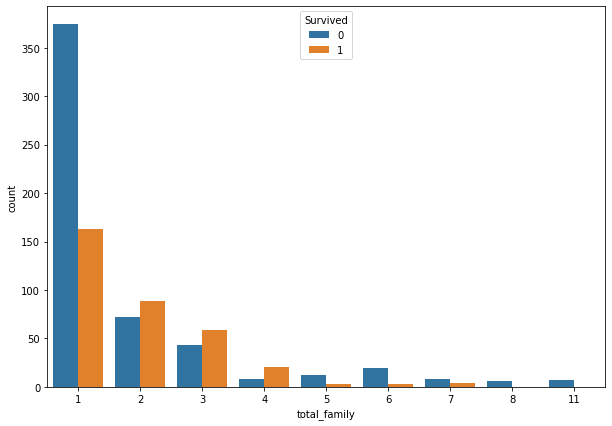

In [449]:
sns.countplot(data=train_data,x='total_family', hue='Survived')
fig = plt.gcf()
fig.set_size_inches(10,7)

Single people i.e., with no parents or siblings and spouse survived in comparison to people with a large total family.

In [450]:
train_data.shape


(891, 9)

In [451]:
test_data.shape


(418, 9)

In [452]:
train_data["Embarked"].fillna(train_data["Embarked"].value_counts().index[0],inplace=True)

In [453]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le1= LabelEncoder()
train_data['Embarked']=le1.fit_transform(train_data['Embarked'])
train_data.head()


,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,total_family,Single
0,1,0,3,1,22.0,7.2500,2,2,0
1,2,1,1,0,38.0,71.2833,0,2,0
2,3,1,3,0,26.0,7.9250,2,1,1
3,4,1,1,0,35.0,53.1000,2,2,0
4,5,0,3,1,35.0,8.0500,2,1,1


In [454]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le2= LabelEncoder()
test_data['Embarked']=le2.fit_transform(test_data['Embarked'])
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,total_family,Single
0,892,3,"Kelly, Mr. James",1,34.5,7.8292,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,7.0000,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,9.6875,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,8.6625,2,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,12.2875,2,3,0


In [455]:
train_data= train_data[[c for c in train_data if c not in ['Survived']] + ['Survived']]
train_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,total_family,Single,Survived
0,1,3,1,22.0,7.2500,2,2,0,0
1,2,1,0,38.0,71.2833,0,2,0,1
2,3,3,0,26.0,7.9250,2,1,1,1
3,4,1,0,35.0,53.1000,2,2,0,1
4,5,3,1,35.0,8.0500,2,1,1,0


In [456]:
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)

In [457]:
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)

In [458]:
train_data.shape

(891, 9)

In [459]:
test_data.shape

(418, 9)

In [460]:
train_data.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,total_family,Single,Survived
0,1,3,1,22.0,7.2500,2,2,0,0
1,2,1,0,38.0,71.2833,0,2,0,1
2,3,3,0,26.0,7.9250,2,1,1,1
3,4,1,0,35.0,53.1000,2,2,0,1
4,5,3,1,35.0,8.0500,2,1,1,0


In [461]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Embarked,total_family,Single
0,892,3,"Kelly, Mr. James",1,34.5,7.8292,1,1,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,7.0000,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,9.6875,1,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,8.6625,2,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,12.2875,2,3,0


In [472]:
columns=["Pclass", "Sex", "Age" ,"total_family", "Single", "Fare", "Embarked"]
x=train_data[columns]
y=train_data['Survived']

In [473]:
from sklearn.model_selection import train_test_split 
xtrain, xtest, ytrain, ytest = train_test_split( 
        x, y, test_size = 0.25, random_state = 0) 

In [474]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest) 

In [475]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state = 3 ,warm_start=True)
clf.fit(xtrain, ytrain)
y_pred=clf.predict(xtest)
print('Accuracy on training data=',clf.score(xtest,ytest)*100,'%')

Accuracy on training data= 86.99551569506725 %


In [483]:
from sklearn.model_selection import cross_val_score
clf = GradientBoostingClassifier(random_state = 3 ,warm_start=True)
scores = cross_val_score(clf, xtrain, ytrain, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80597015 0.82089552 0.85074627 0.86567164 0.76119403 0.79104478
 0.7761194  0.86567164 0.8030303  0.84848485]
Mean: 0.8188828584350972
Standard Deviation: 0.035529847314116854


In [484]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(random_state = 0 ,warm_start=True)
clf.fit(x, y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0, warm_start=True)

In [427]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(xtrain,ytrain)
rdf_pred=rdf_c.predict(xtest)
rdf_cm=confusion_matrix(ytest,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,ytest)
print(rdf_ac)

0.8251121076233184


In [485]:
y_pred = clf.predict(test_data[columns])

In [486]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": y_pred
    })

submission.to_csv("somya.csv", index=False)
print(submission.shape)

(418, 2)
